In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [40]:
matplotlib.style.use('seaborn-whitegrid')

# Logistic regression
- A method for classification
- Non-continuous, discrete categories, eg., binary groups

# $\theta(z) = \frac{1}{1 + exp(-z)}$

No matter what value u put in for z the output will always be 0 to 1

Set cut-off at 0.5

Linear vs logistic slope

# $y = b_0 + b_1x$

# $p = \frac{1}{1 + e^{(b_0 + b_1x)}}$



In [2]:
train = pd.read_csv('resources/Machine Learning Sections/Logistic-Regression/titanic_train.csv')

In [3]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


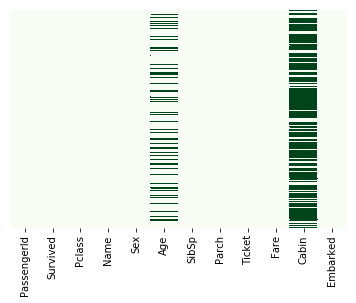

In [5]:
# view all missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='Greens')

In [6]:
# Missing data, we can fill in by imputation
# Fill in missing ages by the averages
# We can be clever and do average age by Pclass

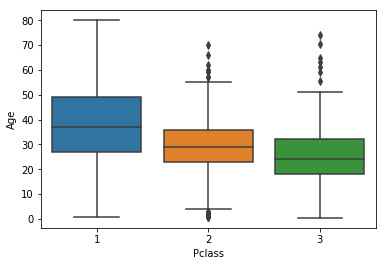

In [7]:
fig, ax =plt.subplots()
sns.boxplot(x='Pclass', y='Age', data=train, ax=ax)

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
            
    else:
        return Age

In [9]:
# Fill in age
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

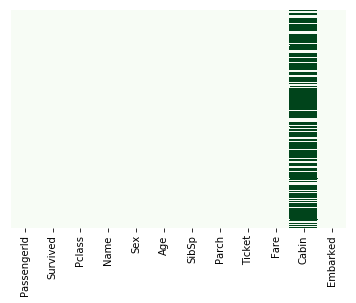

In [10]:
# Show age is filled in
sns.heatmap(train.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='Greens')

In [11]:
# too much missing cabin data so drop from df
train.drop('Cabin', axis=1, inplace=True)

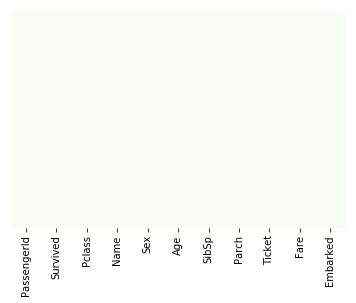

In [12]:
# Show age is filled in
sns.heatmap(train.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='Greens')

In [13]:
# drop last values
train.dropna(inplace=True)

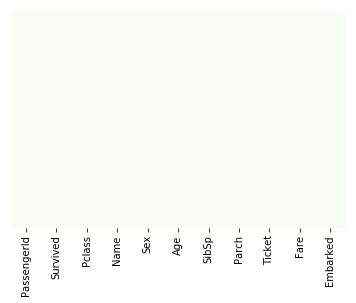

In [14]:
# Show age is filled in
sns.heatmap(train.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='Greens')

In [15]:
# ML algorithms cannot use strings
# Convert categories to integers 'dummy variables'
# Use the pandas get_dummies function
# Need to avoid multi-colinearity...
# if its not male its female - only include one sex col

In [16]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [17]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [18]:
# Drop all numerical
train.drop(['PassengerId','Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [19]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# what is difference between leaving the Pclass col as a category or dummy

# Build the logistic regression model

In [20]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()

In [25]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
# for classification problems sklearn has...
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print(classification_report(y_test, predictions))

'             precision    recall  f1-score   support\n\n          0       0.87      0.96      0.91       162\n          1       0.96      0.86      0.91       168\n\navg / total       0.91      0.91      0.91       330\n'

In [67]:
print(confusion_matrix(y_test, predictions))

[[156   6]
 [ 24 144]]


In [31]:
ad_data = pd.read_csv('resources/Machine Learning Sections/Logistic-Regression/advertising.csv')

In [32]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [33]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


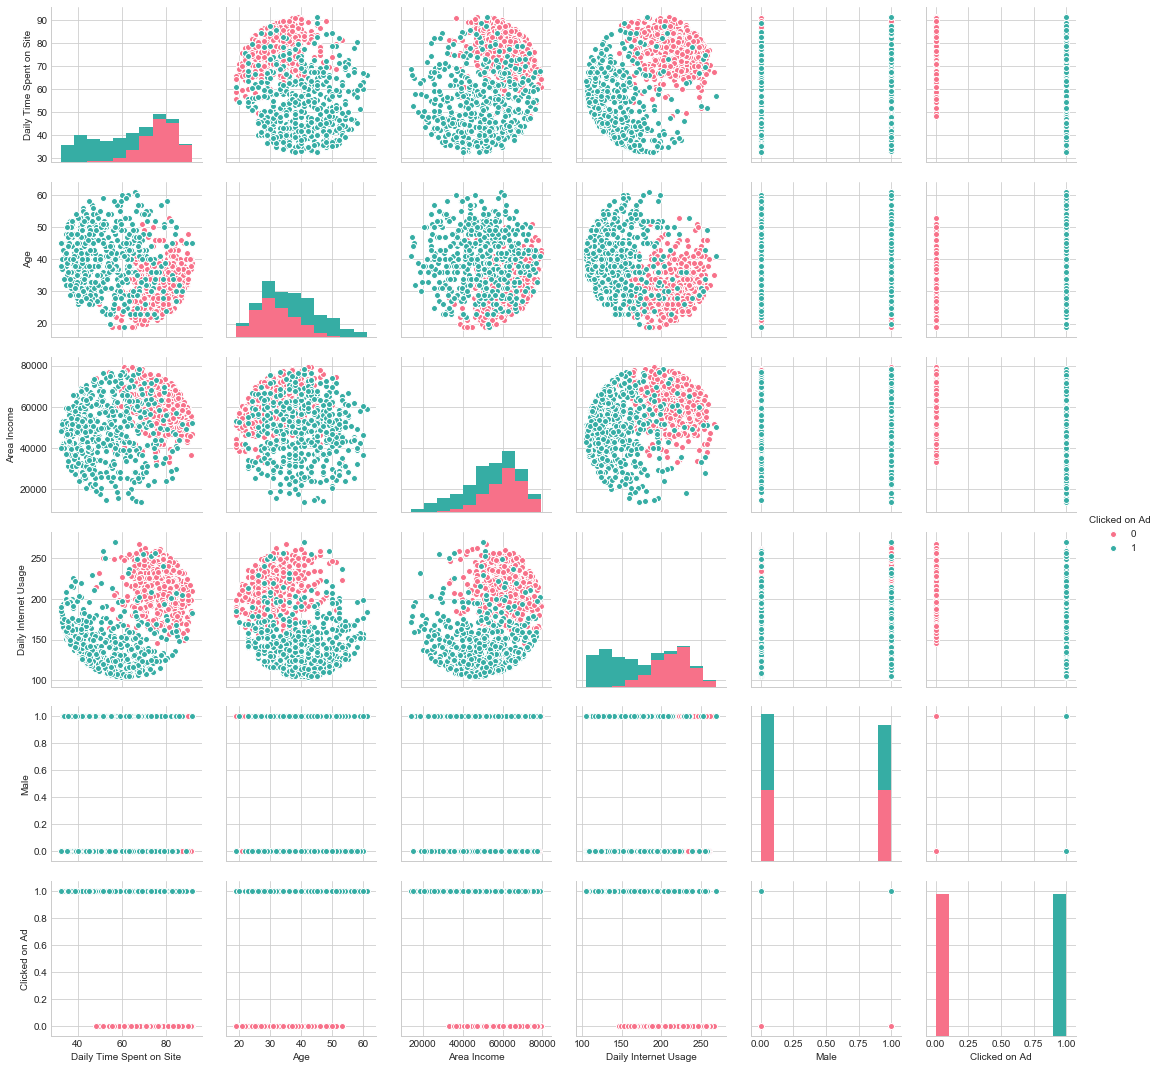

In [53]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette="husl")

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [58]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
predictions = logmodel.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330

[[156   6]
 [ 24 144]]
